testMu0 [[-0.20090393  0.28851331]]
testMu1 [[0.0519352  0.69576571]]
00000 0.5347613669141466 0.16811634003605805
11111 0.38754523940448565 0.17068206997834215
0.5261269369320593


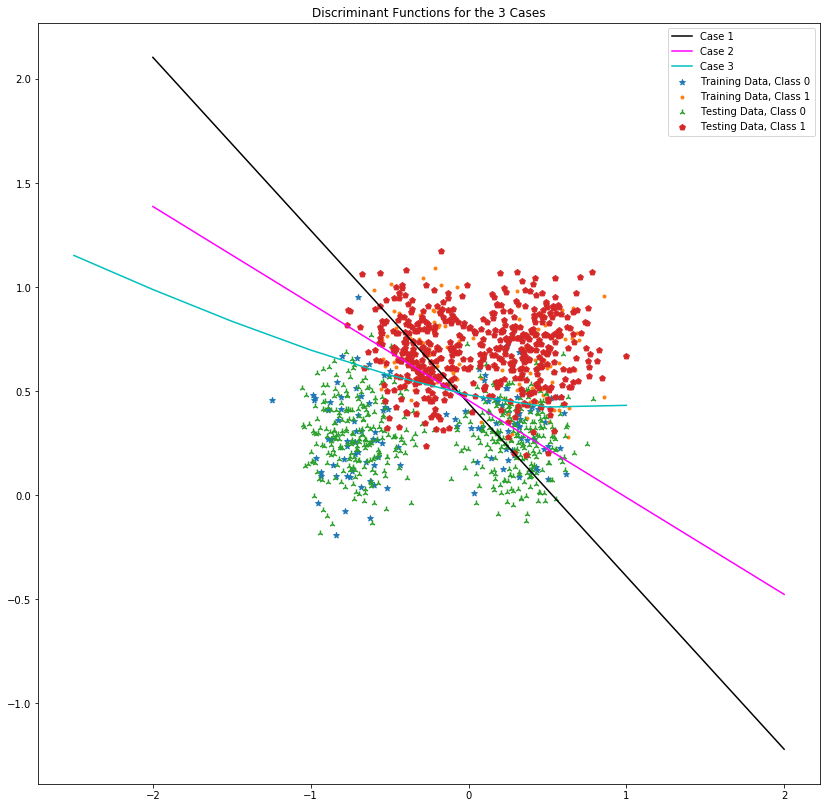

In [520]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sympy as sym
import math 

#################LOADING DATA################################################
synth_train = pd.read_csv('synth.tr.txt',delim_whitespace = 1, header=None)
synth_train.columns = ['x1', 'x2', 'y']
tr0, tr1 = synth_train[synth_train['y']==0], synth_train[synth_train['y']==1]
#print('tr0', tr0)
#print('tr1', tr1)


#synth_test = pd.read_csv('synth.te.txt',delim_whitespace = 1, header=None)
#synth_test.columns = ['x1', 'x2', 'y']
#te0, te1 = synth_test[synth_test['y']==0], synth_test[synth_test['y']==1]

def gaussian_mle(synth):                                                                                                                                                                               
    mu = synth.mean()                                                                                                                                                                            
    var = (synth-mu).T @ (synth-mu) / synth.shape[0] 

    return mu, var

testMu0 = np.array([[gaussian_mle(te0)[0][0], gaussian_mle(te0)[0][1]]])
testMu1 = np.array([[gaussian_mle(te1)[0][0], gaussian_mle(te1)[0][1]]])
print("testMu0", testMu0)
print("testMu1", testMu1)

te0_x1σ, tr0_x2σ = te0.loc[:,'x1'].std(), te0.loc[:,'x2'].std()
te1_x1σ, te1_x2σ = te1.loc[:,'x1'].std(), te1.loc[:,'x2'].std()
print("00000", te0_x1σ, tr0_x2σ )
print("11111", te1_x1σ, te1_x2σ )

##############MAXIMUM LIKELIHOOD ESTIMATION###################################
def gaussian_mle(synth):                                                                                                                                                                               
    mu = synth.mean()                                                                                                                                                                            
    var = (synth-mu).T @ (synth-mu) / synth.shape[0] 

    return mu, var


tr0mu = np.array([[gaussian_mle(tr0)[0][0], gaussian_mle(tr0)[0][1]]])
gaussian_mle(tr0) #tr0Cov
tr0Cov = np.array([[0.274595, 0.011139],[0.011139, 0.035830]])
tr1mu = np.array([[gaussian_mle(tr1)[0][0], gaussian_mle(tr1)[0][1]]])
gaussian_mle(tr1) #tr1Cov 
tr1Cov = np.array([[0.15847, -0.015450],[-0.01545, 0.029719]])

tr0_x1σ, tr0_x2σ = tr0.loc[:,'x1'].std(), tr0.loc[:,'x2'].std()
tr1_x1σ, tr1_x2σ = tr1.loc[:,'x1'].std(), tr1.loc[:,'x2'].std()
print(tr0_x1σ)
#print(tr0_x2σ)

#############################Variables#########################


#Sum of Σ



#print(Σinv)



#print(tr0_x1σ,tr0_x2σ,tr1_x1σ,tr1_x2σ)


########################### CASE 1 ###########################################
x1, x2 = sym.Symbol('x1'), sym.Symbol('x2')
xar = np.array([x1,x2])

tr0mu = np.array([-0.221470237, 0.3257549406])
tr1mu = np.array([0.075954312, 0.682968913])


Eq_1 = ((x1*tr0mu[0] - x1*tr1mu[0])/(-tr0mu[1] + tr1mu[1])) 
Eq_2 = ((-tr0mu[0]**2 -tr0mu[1]**2  + tr1mu[0]**2 + tr1mu[1]**2)/ (-2*tr0mu[1] + 2*tr1mu[1]))

CASE1 = Eq_1 + Eq_2






########################### CASE 2 ###########################################

prior = 0.5
Σ01av = ((tr0_x1σ + tr0_x2σ)/2)
Σ02av = ((tr1_x1σ + tr1_x2σ)/2)

tr0mu = np.array([-0.221470237, 0.3257549406])
tr1mu = np.array([0.075954312, 0.682968913])

Σ = np.array([(Σ01av, 0), (0, Σ02av)]) 
#print(Σ)
Σinv = np.linalg.inv(Σ)


x1, x2 = sym.Symbol('x1'), sym.Symbol('x2')
xar = np.array([x1,x2])


Eq1 = np.dot(np.dot(Σinv,tr0mu),xar) + (np.dot(np.dot(Σinv,tr0mu), tr0mu) * (-1)*prior)
Eq2 = np.dot(np.dot(Σinv,tr1mu),xar) + (np.dot(np.dot(Σinv,tr1mu), tr1mu) * (-1)*prior)
CASE2 = Eq1 - Eq2


########################### CASE 3 ##########################################

x1, x2 = sym.Symbol('x1'), sym.Symbol('x2')
xar = np.array([x1,x2])
#tr0Cov, tr1Cov, tr0mu, tr1mu
tr0C_inv, tr1C_inv = np.linalg.inv(tr0Cov), np.linalg.inv(tr1Cov)

det0, det1 = np.linalg.det(tr0Cov), np.linalg.det(tr1Cov)


#print("inv", tr0C_inv)
#print("inv",tr1C_inv)


Eq1 = (-0.5)*tr0C_inv 
Eq1_1 = np.dot(np.dot(np.transpose(xar), Eq1), xar)
Eq2 = np.dot(np.transpose(np.dot(tr0C_inv, tr0mu)), xar)
Eq3 = np.dot(np.dot(np.transpose(tr0mu),tr0C_inv), tr0mu)
Eq3_1 = np.log(det0)
EqSum = ((Eq3 + Eq3_1) *(-1)*0.5) + Eq1_1 + Eq2

GEq1 = (-0.5)*tr1C_inv
GEq1_1 = np.dot(np.dot(np.transpose(xar), GEq1), xar)
GEq2 = np.dot(np.transpose(np.dot(tr1C_inv, tr1mu)), xar)
GEq3 = np.dot(np.dot(np.transpose(tr1mu),tr1C_inv), tr1mu)
GEq3_1 = np.log(det1)
GEqSum = ((GEq3 + GEq3_1) *(-1)*0.5) + GEq1_1 + GEq2


EQF = EqSum - GEqSum
CASE3 = sym.solve(EQF, x2)


####################### PLOTS ##############################################
x = np.linspace(-2, 2, 1000)
plt.figure(figsize=(14, 14))
plt.plot(x, (-0.830986*x) + 0.442254,'-k', label="Case 1")  # solid
plt.plot(x, (-0.465898413008571*x) + 0.455912515037513,'-r', color= 'magenta', label="Case 2")
plt.scatter(tr0['x1'], tr0['x2'], label="Training Data, Class 0", marker = '*')
plt.scatter(tr1['x1'], tr1['x2'], label="Training Data, Class 1", marker = '.')
plt.scatter(te0['x1'], te0['x2'], label="Testing Data, Class 0", marker = '2')
plt.scatter(te1['x1'],te1['x2'],  label="Testing Data, Class 1", marker = 'p')
x = np.arange(-2.5, 1.2, 0.5)
y=[]
for c in x:
    i = CASE3[0].subs(x1,c)
    y.append(i)
plt.plot(x,y,'-c', label= "Case 3")
plt.title("Discriminant Functions for the 3 Cases")
plt.legend()
plt.show()
#mu0_11 = mu0tr[0]
#mu0_12 = 

0.47999999999999976
0.72


TypeError: only size-1 arrays can be converted to Python scalars

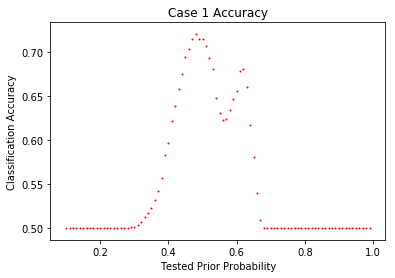

In [709]:
#EVALUATIONS
import math
import sympy
s_test = pd.read_csv('synth.te.txt',delim_whitespace = 1, header=None)
s_test.columns = ['x1', 'x2', 'y']
#print(s_test)
########################### CASE 1 ########################################
def g1_0(x, y, w):
    xar = np.array([x,y])
    A=(-1/(2*tr0_x1σ))
    B= np.dot(xar, np.transpose(xar))  
    C=-2*np.dot(tr0mu, np.transpose(xar))
    D=np.dot(tr0mu, np.transpose(tr0mu)).item()
    Eq1 = A * B - C + D + math.log(w)  
    return Eq1

def g1_1(x,y,w):
    xar = np.array([x,y])
    A=(-1/(2*tr1_x1σ))
    B= np.dot(xar, np.transpose(xar))  
    C=-2*np.dot(tr1mu, np.transpose(xar))
    D=np.dot(tr0mu, np.transpose(tr1mu)).item()
    Eq2 = A * B - C + D + math.log(1-w)  
    return Eq2
    
def Classify(s_test,w):
    classified = 0
    unclassified = 0
    for index,row in s_test.iterrows():
        x1=row['x1']
        x2=row['x2']
        g0_out = g1_0(x1,x2,w)
        g1_out = g1_1(x1,x2,w)
        if g0_out>=g1_out:
            guessLabel=0
        else:
            guessLabel=1
        if guessLabel==row['y']:
            classified=classified+1
        else:
            unclassified=unclassified
    return classified/s_test.shape[0]

def PriorProb_test(Ws,s_test):
    accuracyArray =[]
    for i in range(len(Ws)):
        w=Ws[i]
        accuracy = Classify(s_test, w)
        accuracyArray.append(accuracy)
    accuracyArray = np.array(accuracyArray)
    return accuracyArray

Ws = np.arange(0.1, 1.0, 0.01)
a = Ws
b = PriorProb_test(Ws, s_test)



fig, pl = plt.subplots()
pl.scatter(a,b,s=0.99, color= 'Red')
pl.set(title="Case 1 Accuracy")
pl.set(xlabel="Tested Prior Probability")
pl.set(ylabel="Classification Accuracy")
pl.set
print(t[np.argmax(b)])
print(np.max(b))
print(Classify(s_test, Ws))

plt.legend()    
plt.show()


    

    
    
    








0.45999999999999985
0.759


TypeError: only size-1 arrays can be converted to Python scalars

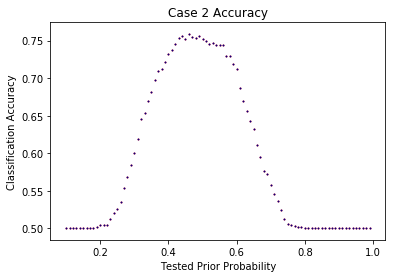

In [702]:
########################### CASE 2 ######################################
import math
def g2_0(x, y, w):
    xar = np.array([x,y])
    Eq1 = np.dot(np.dot(Σinv,tr0mu),xar) + (np.dot(np.dot(Σinv,tr0mu), tr0mu) * (-1)*prior) + math.log(w)
    return Eq1

def g2_1(x, y, w):
    xar = np.array([x,y])
    Eq2 = np.dot(np.dot(Σinv,tr1mu),xar) + (np.dot(np.dot(Σinv,tr1mu), tr1mu) * (-1)*prior) + math.log(1-w)
    return Eq2

def Classify(s_test, w):
    classified = 0
    unclassified = 0
    for index,row in s_test.iterrows():
        x1 = row['x1']
        x2 = row['x2']
        g0_out = g2_0(x1,x2,w)
        g1_out = g2_1(x1,x2,w)
        if g0_out >= g1_out:
            guessLabel = 0
        else:
            guessLabel = 1
        if guessLabel==row['y']:
            classified = classified+1
        else:
            unclassified = unclassified
    return classified/s_test.shape[0]

def PriorProb_test(Ws,s_test):
    accuracyArray = []
    for i in range(len(Ws)):
        w = Ws[i]
        accuracy = Classify(s_test, w)
        accuracyArray.append(accuracy)
    accuracyArray = np.array(accuracyArray)
    return accuracyArray

Ws = np.arange(0.1, 1.0, 0.01)
a = Ws
b = PriorProb_test(Ws, s_test)



fig, pl = plt.subplots()
pl.scatter(a,b,s=0.99, color= 'Navy')
pl.set(title="Case 2 Accuracy")
pl.set(xlabel="Tested Prior Probability")
pl.set(ylabel="Classification Accuracy")
pl.set
print(t[np.argmax(b)])
print(np.max(b))
print(Classify(s_test, Ws))

plt.legend()    
plt.show()


G3_0 0.37905923296618493
0.45999999999999985
0.9


TypeError: only size-1 arrays can be converted to Python scalars

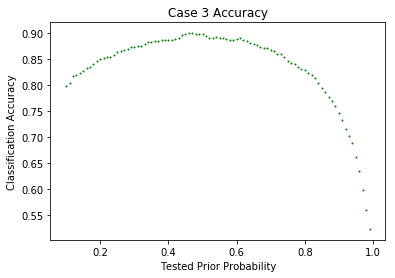

In [711]:
########################### CASE 3######################################
def g3_0(x, y, w):
    xar = np.array([x,y])
    Eq1 = -0.5*tr0C_inv 
    Eq1_1 = np.dot(np.dot(np.transpose(xar), Eq1), xar)
    Eq2 = np.dot(np.transpose(np.dot(tr0C_inv, tr0mu)), xar)
    Eq3 = np.dot(np.dot(np.transpose(tr0mu),tr0C_inv), tr0mu)
    Eq3_1 = np.log(det0)
    G0Log = math.log(w)
    EqSum = (Eq3 + Eq3_1) * -0.5 + Eq1_1 + Eq2 + G0Log
    return EqSum
print("G3_0",g3_0(.5,.5,.5))

def g3_1(x, y, w):
    xar = np.array([x,y])
    GEq1 = (-0.5)*tr1C_inv
    GEq1_1 = np.dot(np.dot(np.transpose(xar), GEq1), xar)
    GEq2 = np.dot(np.transpose(np.dot(tr1C_inv, tr1mu)), xar)
    GEq3 = np.dot(np.dot(np.transpose(tr1mu),tr1C_inv), tr1mu)
    GEq3_1 = np.log(det1)
    G1Log = math.log(1-w)                      
    GEqSum = (GEq3 + GEq3_1) *(-0.5) + GEq1_1 + GEq2 + G1Log
    return GEqSum


def Classify(s_test,w):
    classified = 0
    unclassified = 0
    for index,row in s_test.iterrows():
        x1=row['x1']
        x2=row['x2']
        g0_out = g3_0(x1,x2,w)
        g1_out = g3_1(x1,x2,w)
        if g0_out>=g1_out:
            guessLabel=0
        else:
            guessLabel=1
        if guessLabel==row['y']:
            classified=classified+1
        else:
            unclassified=unclassified
    return classified/s_test.shape[0]

def PriorProb_test(Ws,s_test):
    accuracyArray =[]
    for i in range(len(Ws)):
        w=Ws[i]
        accuracy = Classify(s_test, w)
        accuracyArray.append(accuracy)
    accuracyArray = np.array(accuracyArray)
    return accuracyArray


Ws = np.arange(0.1, 1.0, 0.01)
a = Ws
b = PriorProb_test(Ws, s_test)



fig, pl = plt.subplots()
pl.scatter(a,b,s=0.99, color= 'Green')
pl.set(title="Case 3 Accuracy")
pl.set(xlabel="Tested Prior Probability")
pl.set(ylabel="Classification Accuracy")
pl.set
print(t[np.argmax(b)])
print(np.max(b))
print(Classify(s_test, Ws))

plt.legend()    
plt.show()

0.1
0.893
0.893


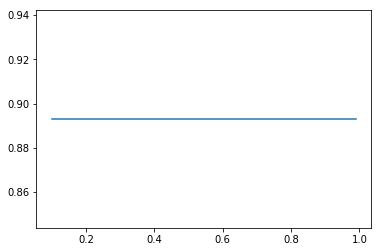

In [708]:
from mpmath import *
import math
from math import e

################## Two Modal Analysis#######################
def g0(x, y, w):
    mu1 = np.array([-0.75, 0.2])
    mu2 = np.array([0.3, 0.3])
    S1 = np.array([[0.25, 0], [0, 0.3]])
    S2 = np.array([[0.1, 0], [0, 0.1]]);
    A1 = 0.8
    A2 = 1 - A1
    d = 2
    S1_inv = np.linalg.inv(S1)
    S2_inv = np.linalg.inv(S2)
    xar = np.array([x,y])
    
    p1a= (2*math.pi)**(d/2)
    p1b=A1/((np.linalg.det(S1))**(1/2)*p1a )
    p1c=np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar - mu1)),S1_inv),(xar-mu1))))
    p1=p1b*p1c
    
    p2a= (2*math.pi)**(d/2)
    p2b=A2/((np.linalg.det(S2))**(1/2)*p1a )
    p2c=np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar-mu2)),S2_inv),(xar-mu2))))
    p2=p2b*p2c
    Eq1 = p2+p1
    
    return Eq1

def g1(x, y, w):
    mu1 = np.array([-0.31, 0.75])
    mu2 = np.array([0.51, 0.76])
    S1 = np.array([[0.25, 0], [0, 0.03]])
    S2 = np.array([[0.1, 0], [0, 0.1]])
    A1 = 0.8
    A2 = 1 - A1
    d = 2
    S1_inv = np.linalg.inv(S1)
    S2_inv = np.linalg.inv(S2)
    xar = np.array([x,y])
    
    p1a = (2*math.pi)**(d/2)
    p1b = A1/((np.linalg.det(S1))**(1/2)*p1a )
    p1c = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar - mu1)),S1_inv),(xar-mu1))))
    p1 = p1b * p1c
    
    p2a = (2*math.pi)**(d/2)
    p2b = A2/((np.linalg.det(S2))**(1/2)*p1a )
    p2c = np.exp((-1/2)*(np.dot(np.dot(np.transpose((xar - mu2)),S2_inv),(xar-mu2))))
    p2 = p2b * p2c
    Eq2 = p2 + p1
    return Eq2
    
    
def Classify(s_test,w):
    classified = 0
    unclassified = 0
    for index,row in s_test.iterrows():
        x1=row['x1']
        x2=row['x2']
        g0_out = g0(x1,x2,w)
        g1_out = g1(x1,x2,w)
        if g0_out>=g1_out:
            guessLabel=0
        else:
            guessLabel=1
        if guessLabel==row['y']:
            classified=classified+1
        else:
            unclassified=unclassified
    return classified/s_test.shape[0]

def PriorProb_test(Ws,s_test):
    accuracyArray =[]
    for i in range(len(Ws)):
        w=Ws[i]
        accuracy = Classify(s_test, w)
        accuracyArray.append(accuracy)
    accuracyArray = np.array(accuracyArray)
    return accuracyArray


Ws = np.arange(0.1, 1.0, 0.01)
a = Ws
b = PriorProb_test(Ws, s_test)



fig, ax = plt.subplots()
ax.plot(t,s)
print(t[np.argmax(s)])
print(np.max(s))
print(Classify(s_test, Ws))
    
plt.show()


In [ ]:
#tr0x1, tr0x2, tr0y = tr0['x1'].tolist(), tr0['x2'].tolist(), tr0['y'].tolist()
#tr1x1, tr1x2, tr1y = tr1['x1'].tolist(), tr1['x2'].tolist(), tr1['y'].tolist() 
#te0x1, te0x2, te0y = te0['x1'].tolist(), te0['x2'].tolist(), te0['y'].tolist()
#te1x1, te1x2, te1y = te1['x1'].tolist(), te1['x2'].tolist(), te1['y'].tolist()
#Plot tr0,tr1,te0,te1, y=mx+b

In [ ]:
def main():

    args = parse_cmdline() 

    Xtrain, ytrain = load_data(args.train)

    Xtest, ytest = load_data(args.test)

    model = mpp(args.case)

    model.fit(Xtrain, ytrain)

    y_model = model.predict(Xtest)

    accuracy = accuracy_score(ytest, y_model)

    print('accuracy = ', accuracy